<p>Student: Uğur Ali Kaplan<br/>
ID: 150170042</p>

In [1]:
import numpy as np
import os
import cv2
import moviepy.editor as mpy
import matplotlib.pyplot as plt

<h2>1</h2>

In [2]:
data_path = os.path.join(os.curdir, "HW1_material") # Assuming notebook is in the parent directory of materials

In [3]:
background = cv2.imread(os.path.join(data_path, "Malibu.jpg"))

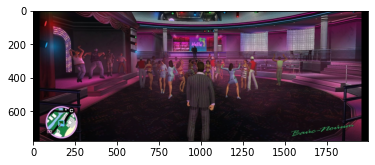

In [4]:
plt.imshow(background[:,:,[2, 1, 0]])

In [5]:
background.shape

(776, 1998, 3)

In [6]:
background_height, background_width, _ = background.shape
ratio = 360 / background_height

# Resize background and protect aspect ratio
background = cv2.resize(background, (int(background_width * ratio), 360))

print(background.shape)

(360, 926, 3)


In [7]:
cat_path = os.path.join(data_path, "cat") # Path to the cat images

In [8]:
image = cv2.imread(os.path.join(cat_path, "cat_5.png"))
image_g_channel = image[:, :, 1]
image_r_channel = image[:, :, 0]

foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)
nonzero_x, nonzero_y = np.nonzero(foreground)

nonzero_cat_values = image[nonzero_x, nonzero_y, :]

new_frame = background.copy()
new_frame[nonzero_x, nonzero_y, :] = nonzero_cat_values
new_frame = new_frame[:, :, [2, 1, 0]]

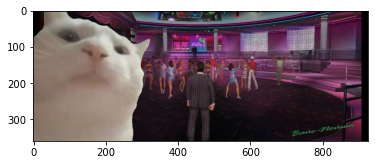

In [9]:
plt.imshow(new_frame)

In [10]:
images_list = list()
num_images = len(os.listdir(cat_path)) # Find the number of cat images in the folder
for num in range(num_images):
    image = cv2.imread(os.path.join(cat_path, "cat_" + str(num) + ".png"))
    image_g_channel = image[:, :, 1]
    image_r_channel = image[:, :, 0]

    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)
    nonzero_x, nonzero_y = np.nonzero(foreground)

    nonzero_cat_values = image[nonzero_x, nonzero_y, :]

    new_frame = background.copy()
    new_frame[nonzero_x, nonzero_y, :] = nonzero_cat_values
    new_frame = new_frame[:, :, [2, 1, 0]]
    images_list.append(new_frame)
    
clip = mpy.ImageSequenceClip(images_list, fps=25)
audio = mpy.AudioFileClip(os.path.join(data_path, "selfcontrol_part.wav")).set_duration(clip.duration)
clip = clip.set_audio(audioclip = audio)
clip.write_videofile("part1_video.mp4", codec="libx264")

chunk:  20%|██        | 32/159 [00:00<00:00, 308.33it/s, now=None]

Moviepy - Building video part1_video.mp4.
MoviePy - Writing audio in part1_videoTEMP_MPY_wvf_snd.mp3


t:   3%|▎         | 6/181 [00:00<00:03, 51.73it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video part1_video.mp4



Moviepy - Done !
Moviepy - video ready part1_video.mp4


<h2>2</h2>

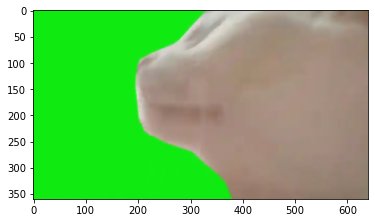

In [11]:
plt.imshow(image[:, ::-1, [2, 1, 0]]) # Flip the values to mirror the image

In [12]:
# We have to shift the mirrored image as image width is less than background width
translate = background.shape[1] - cv2.imread(os.path.join(cat_path, "cat_5.png")).shape[1]

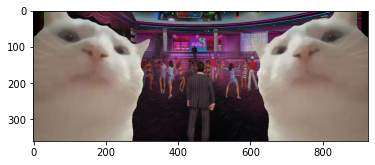

In [13]:
# Operations on a single frame

image = cv2.imread(os.path.join(cat_path, "cat_5.png"))
m_image = image[:, ::-1, :] # Mirrored Image

image_g_channel = image[:, :, 1]
image_r_channel = image[:, :, 0]
m_image_g_channel = m_image[:, :, 1]
m_image_r_channel = m_image[:, :, 0]

foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)
m_foreground = np.logical_or(m_image_g_channel < 180, m_image_r_channel > 150)

nonzero_x, nonzero_y = np.nonzero(foreground)
m_nonzero_x, m_nonzero_y = np.nonzero(m_foreground)

nonzero_cat_values = image[nonzero_x, nonzero_y, :]
m_nonzero_cat_values = m_image[m_nonzero_x, m_nonzero_y, :]

new_frame = background.copy()
new_frame[nonzero_x, nonzero_y, :] = nonzero_cat_values
new_frame[m_nonzero_x, m_nonzero_y + translate, :] = m_nonzero_cat_values
new_frame = new_frame[:, :, [2, 1, 0]]

plt.imshow(new_frame)

In [14]:
# Do the operations for all frames and create the video

images_list = list()
num_images = len(os.listdir(cat_path))
for num in range(num_images):
    image = cv2.imread(os.path.join(cat_path, "cat_" + str(num) + ".png"))
    m_image = image[:, ::-1, :]

    image_g_channel = image[:, :, 1]
    image_r_channel = image[:, :, 0]
    m_image_g_channel = m_image[:, :, 1]
    m_image_r_channel = m_image[:, :, 0]

    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)
    m_foreground = np.logical_or(m_image_g_channel < 180, m_image_r_channel > 150)

    nonzero_x, nonzero_y = np.nonzero(foreground)
    m_nonzero_x, m_nonzero_y = np.nonzero(m_foreground)

    nonzero_cat_values = image[nonzero_x, nonzero_y, :]
    m_nonzero_cat_values = m_image[m_nonzero_x, m_nonzero_y, :]

    new_frame = background.copy()
    new_frame[nonzero_x, nonzero_y, :] = nonzero_cat_values
    new_frame[m_nonzero_x, m_nonzero_y + translate, :] = m_nonzero_cat_values
    new_frame = new_frame[:, :, [2, 1, 0]]
    images_list.append(new_frame)
    
clip = mpy.ImageSequenceClip(images_list, fps=25)
audio = mpy.AudioFileClip(os.path.join(data_path, "selfcontrol_part.wav")).set_duration(clip.duration)
clip = clip.set_audio(audioclip = audio)
clip.write_videofile("part2_video.mp4", codec="libx264")

chunk:  20%|██        | 32/159 [00:00<00:00, 291.73it/s, now=None]

Moviepy - Building video part2_video.mp4.
MoviePy - Writing audio in part2_videoTEMP_MPY_wvf_snd.mp3


t:   3%|▎         | 6/181 [00:00<00:03, 53.86it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video part2_video.mp4



Moviepy - Done !
Moviepy - video ready part2_video.mp4


<h2>3</h2>

In [15]:
def make_darker(x, dec_intensity):
    """
    Takes an input image x, with 3 channels and represented as RGB.
    Decreases the intensity according to provided argument, dec_intensity.
    If the intensity of a pixel is less than dec_intensity, its new value is mapped to 0.
    """
    x = x - [dec_intensity, dec_intensity, dec_intensity]
    x[x < 0] = 0
    return x

In [16]:
# Create multiple videos with different darkened cats
for dec in [20, 50, 100, 150, 200, 250]:
    images_list = list()
    num_images = len(os.listdir(cat_path))
    for num in range(num_images):
        image = cv2.imread(os.path.join(cat_path, "cat_" + str(num) + ".png"))
        m_image = image[:, ::-1, :]

        image_g_channel = image[:, :, 1]
        image_r_channel = image[:, :, 0]
        m_image_g_channel = m_image[:, :, 1]
        m_image_r_channel = m_image[:, :, 0]

        foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)
        m_foreground = np.logical_or(m_image_g_channel < 180, m_image_r_channel > 150)

        nonzero_x, nonzero_y = np.nonzero(foreground)
        m_nonzero_x, m_nonzero_y = np.nonzero(m_foreground)

        nonzero_cat_values = image[nonzero_x, nonzero_y, :]
        m_nonzero_cat_values = m_image[m_nonzero_x, m_nonzero_y, :]

        new_frame = background.copy()
        new_frame[nonzero_x, nonzero_y, :] = nonzero_cat_values
        m_nonzero_cat_values = make_darker(m_nonzero_cat_values, dec)
        new_frame[m_nonzero_x, m_nonzero_y + translate, :] = m_nonzero_cat_values
        new_frame = new_frame[:, :, [2, 1, 0]]
        images_list.append(new_frame)

    clip = mpy.ImageSequenceClip(images_list, fps=25)
    audio = mpy.AudioFileClip(os.path.join(data_path, "selfcontrol_part.wav")).set_duration(clip.duration)
    clip = clip.set_audio(audioclip = audio)
    clip.write_videofile("part3_video_decreaseby" + str(dec) + ".mp4", codec="libx264")

chunk:  20%|██        | 32/159 [00:00<00:00, 305.33it/s, now=None]

Moviepy - Building video part3_video_decreaseby20.mp4.
MoviePy - Writing audio in part3_video_decreaseby20TEMP_MPY_wvf_snd.mp3


t:   3%|▎         | 6/181 [00:00<00:03, 53.85it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video part3_video_decreaseby20.mp4



Moviepy - Done !
Moviepy - video ready part3_video_decreaseby20.mp4


chunk:   0%|          | 0/159 [00:00<?, ?it/s, now=None]

Moviepy - Building video part3_video_decreaseby50.mp4.
MoviePy - Writing audio in part3_video_decreaseby50TEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]               

MoviePy - Done.
Moviepy - Writing video part3_video_decreaseby50.mp4



Moviepy - Done !
Moviepy - video ready part3_video_decreaseby50.mp4


chunk:  20%|██        | 32/159 [00:00<00:00, 288.95it/s, now=None]

Moviepy - Building video part3_video_decreaseby100.mp4.
MoviePy - Writing audio in part3_video_decreaseby100TEMP_MPY_wvf_snd.mp3


t:   4%|▍         | 7/181 [00:00<00:02, 65.71it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video part3_video_decreaseby100.mp4



Moviepy - Done !
Moviepy - video ready part3_video_decreaseby100.mp4


chunk:  20%|██        | 32/159 [00:00<00:00, 310.65it/s, now=None]

Moviepy - Building video part3_video_decreaseby150.mp4.
MoviePy - Writing audio in part3_video_decreaseby150TEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]               

MoviePy - Done.
Moviepy - Writing video part3_video_decreaseby150.mp4



Moviepy - Done !
Moviepy - video ready part3_video_decreaseby150.mp4


chunk:   0%|          | 0/159 [00:00<?, ?it/s, now=None]

Moviepy - Building video part3_video_decreaseby200.mp4.
MoviePy - Writing audio in part3_video_decreaseby200TEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]               

MoviePy - Done.
Moviepy - Writing video part3_video_decreaseby200.mp4



Moviepy - Done !
Moviepy - video ready part3_video_decreaseby200.mp4


chunk:   0%|          | 0/159 [00:00<?, ?it/s, now=None]

Moviepy - Building video part3_video_decreaseby250.mp4.
MoviePy - Writing audio in part3_video_decreaseby250TEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]               

MoviePy - Done.
Moviepy - Writing video part3_video_decreaseby250.mp4



Moviepy - Done !
Moviepy - video ready part3_video_decreaseby250.mp4


<h2>4</h2>

In [17]:
target_image = cv2.imread(os.path.join(data_path, "StarryNight.jpg"))

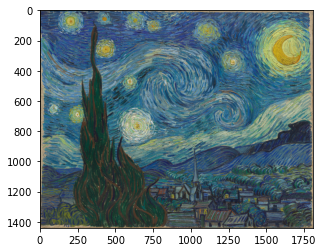

In [18]:
plt.imshow(target_image[:,:,[2, 1, 0]])

In [19]:
def histogram(image):
    _, _, channel = image.shape
    
    hist = np.zeros((256, 1, channel), dtype=np.uint64)
    
    for g in range(256):
        hist[g, 0, ...] = np.sum(np.sum(image == g, 0), 0)
    
    return hist

In [20]:
def hist_to_pdf(hist):
    hist = hist.astype(np.float32)
    hist[:, 0, 2] = hist[:, 0, 2] / hist[:, 0, 2].sum(0)
    hist[:, 0, 1] = hist[:, 0, 1] / hist[:, 0, 1].sum(0)
    hist[:, 0, 0] = hist[:, 0, 0] / hist[:, 0, 0].sum(0)
    return hist

In [21]:
def get_pdf(image):
    hist = histogram(image).astype(np.float32)
    return hist_to_pdf(hist)

In [22]:
def pdf_to_cdf(pdf):
    cdf = np.zeros(pdf.shape)
    for channel in range(cdf.shape[-1]):
        cdf[:, :, channel] = np.cumsum(pdf[:, :, channel], axis=0)
    
    return cdf

In [23]:
target_hist = histogram(target_image)
target_pdf = get_pdf(target_image)

In [24]:
num_images = len(os.listdir(cat_path))
total = np.zeros((256, 1, 3), dtype=np.uint64)

for num in range(num_images):
    hist = np.zeros((256, 1, 3), dtype=np.uint64)
    
    for g in range(256):
        hist[g, 0, ...] = np.sum(np.sum(image == g, 0), 0)
        
    total += hist

average_cat_hist = total / num_images

In [25]:
average_cat_hist = np.round(average_cat_hist)

In [26]:
average_cat_pdf = hist_to_pdf(average_cat_hist)

When we plot the channel histograms, we see a higher concentration of values on some pixel intensities. I think this is related to the green screen in the target images. (I have also used Gimp to check how histograms look like, they seem to match with my results.)

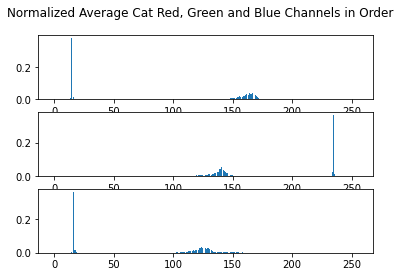

In [27]:
fig, axs = plt.subplots(3)
fig.suptitle("Normalized Average Cat Red, Green and Blue Channels in Order")
axs[0].bar(np.array([x for x in range(256)]), average_cat_pdf[:, 0, 2])
axs[1].bar(np.array([x for x in range(256)]), average_cat_pdf[:, 0, 1])
axs[2].bar(np.array([x for x in range(256)]), average_cat_pdf[:, 0, 0])
plt.show()

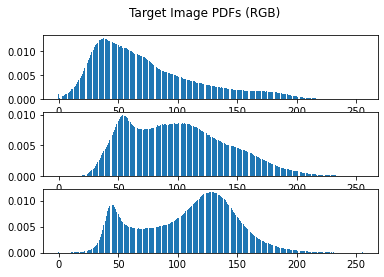

In [28]:
fig, axs = plt.subplots(3)
fig.suptitle("Target Image PDFs (RGB)")
axs[0].bar(np.array([x for x in range(256)]), target_pdf[:, 0, 2])
axs[1].bar(np.array([x for x in range(256)]), target_pdf[:, 0, 1])
axs[2].bar(np.array([x for x in range(256)]), target_pdf[:, 0, 0])
plt.show()

In [29]:
average_cat_cdf = pdf_to_cdf(average_cat_pdf)
target_cdf = pdf_to_cdf(target_pdf)

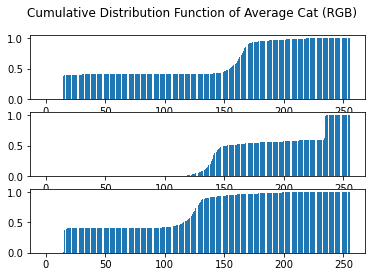

In [30]:
fig, axs = plt.subplots(3)
fig.suptitle("Cumulative Distribution Function of Average Cat (RGB)")
axs[0].bar(np.array([x for x in range(256)]), average_cat_cdf[:, 0, 2])
axs[1].bar(np.array([x for x in range(256)]), average_cat_cdf[:, 0, 1])
axs[2].bar(np.array([x for x in range(256)]), average_cat_cdf[:, 0, 0])
plt.show()

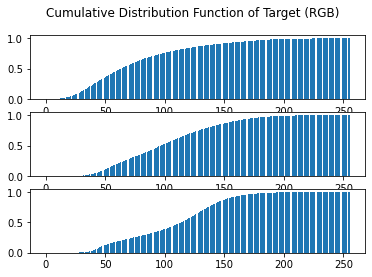

In [31]:
fig, axs = plt.subplots(3)
fig.suptitle("Cumulative Distribution Function of Target (RGB)")
axs[0].bar(np.array([x for x in range(256)]), target_cdf[:, 0, 2])
axs[1].bar(np.array([x for x in range(256)]), target_cdf[:, 0, 1])
axs[2].bar(np.array([x for x in range(256)]), target_cdf[:, 0, 0])
plt.show()

In [32]:
deneme = np.zeros(image.shape, dtype=np.uint8)
deneme[:, :, 2] = np.uint8(255 * average_cat_cdf[:, 0, 2][image[:, :, 2]])
deneme[:, :, 1] = np.uint8(255 * average_cat_cdf[:, 0, 1][image[:, :, 1]])
deneme[:, :, 0] = np.uint8(255 * average_cat_cdf[:, 0, 0][image[:, :, 0]])

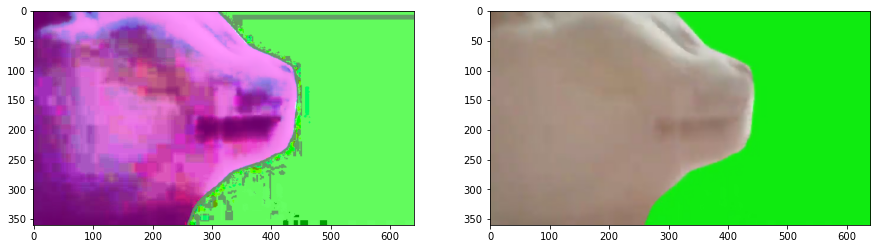

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(deneme[:, :, [2,1,0]])
axs[1].imshow(image[:, :, [2,1,0]])
plt.show()

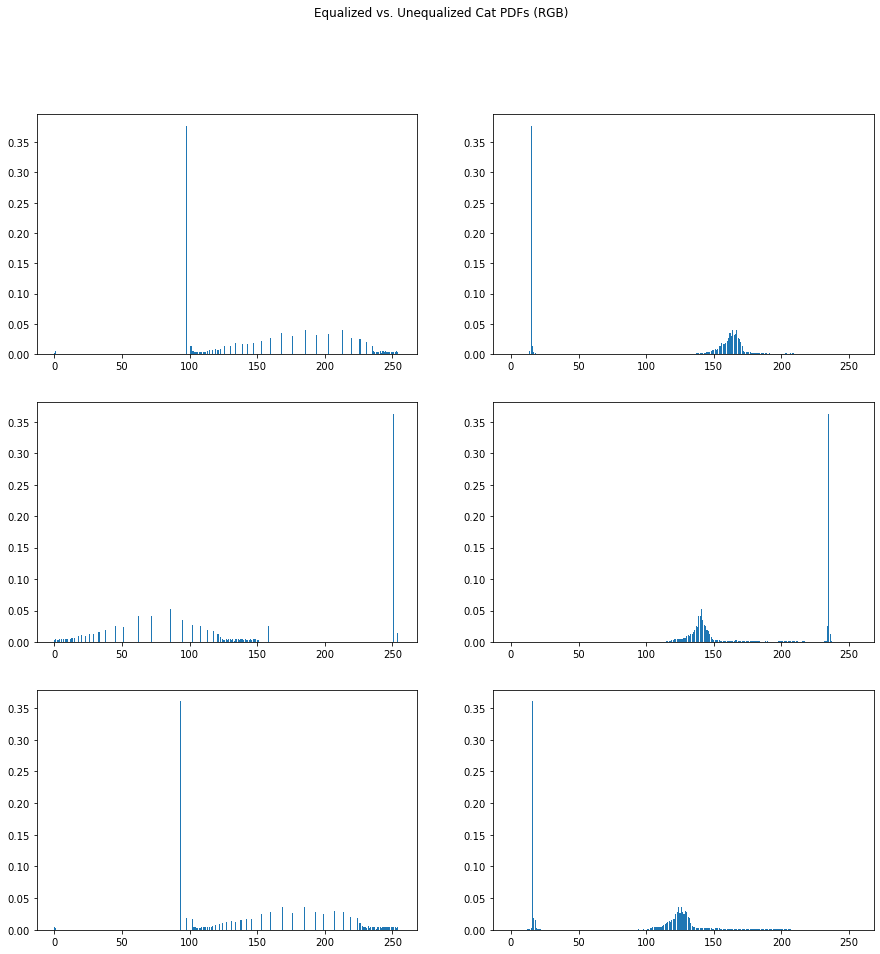

In [34]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Equalized vs. Unequalized Cat PDFs (RGB)")
deneme_pdf = get_pdf(deneme)
image_pdf = get_pdf(image)

axs[0, 0].bar(np.array([x for x in range(256)]), deneme_pdf[:, 0, 2])
axs[1, 0].bar(np.array([x for x in range(256)]), deneme_pdf[:, 0, 1])
axs[2, 0].bar(np.array([x for x in range(256)]), deneme_pdf[:, 0, 0])
axs[0, 1].bar(np.array([x for x in range(256)]), image_pdf[:, 0, 2])
axs[1, 1].bar(np.array([x for x in range(256)]), image_pdf[:, 0, 1])
axs[2, 1].bar(np.array([x for x in range(256)]), image_pdf[:, 0, 0])
plt.show()

In [35]:
def histogram_matching(image_cdf, target_cdf):
    
    lut = np.zeros(image_cdf.shape)
    
    for channel in range(lut.shape[-1]):
        g_target = 0
        for g_image in range(256):
            while ((g_target < 255) and \
                   (image_cdf[g_image, 0, channel] < 1) and \
                   target_cdf[g_target, 0, channel] < image_cdf[g_image, 0, channel]):
                g_target += 1
            lut[g_image, 0, channel] = g_target
            
    return lut

In [36]:
mapping = histogram_matching(average_cat_cdf, target_cdf)

In [37]:
abc = np.zeros(image.shape, dtype=np.uint8)
abc[:, :, 2] = np.uint8(mapping[:, 0, 2][image[:, :, 2]])
abc[:, :, 1] = np.uint8(mapping[:, 0, 1][image[:, :, 1]])
abc[:, :, 0] = np.uint8(mapping[:, 0, 0][image[:, :, 0]])

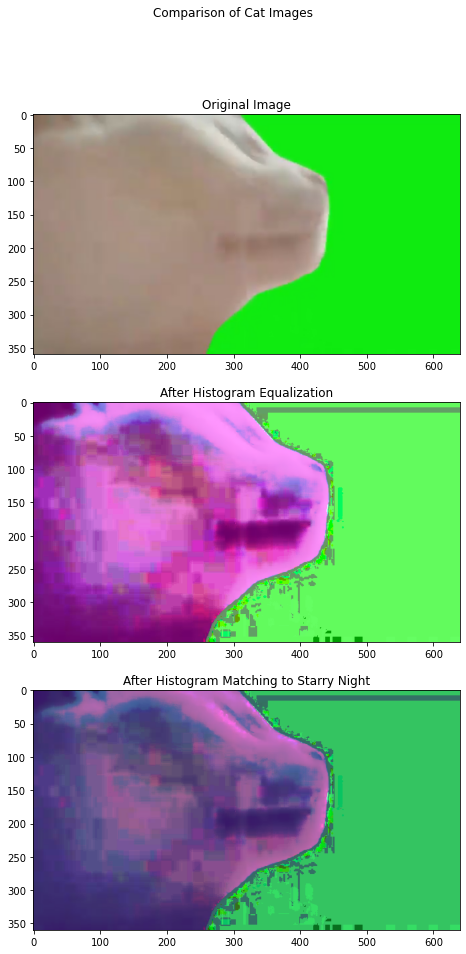

In [38]:
fig, axs = plt.subplots(3, figsize=(15,15))
plt.suptitle("Comparison of Cat Images")
axs[0].set_title("Original Image")
axs[0].imshow(image[:, :, [2, 1, 0]])
axs[1].set_title("After Histogram Equalization")
axs[1].imshow(deneme[:, :, [2, 1, 0]])
axs[2].set_title("After Histogram Matching to Starry Night")
axs[2].imshow(abc[:, :, [2, 1, 0]])

In [39]:
images_list = list()
num_images = len(os.listdir(cat_path))
for num in range(num_images):
    image = cv2.imread(os.path.join(cat_path, "cat_" + str(num) + ".png"))
    m_image = image[:, ::-1, :]

    image_g_channel = image[:, :, 1]
    image_r_channel = image[:, :, 0]
    m_image_g_channel = m_image[:, :, 1]
    m_image_r_channel = m_image[:, :, 0]

    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)
    m_foreground = np.logical_or(m_image_g_channel < 180, m_image_r_channel > 150)

    nonzero_x, nonzero_y = np.nonzero(foreground)
    m_nonzero_x, m_nonzero_y = np.nonzero(m_foreground)

    nonzero_cat_values = image[nonzero_x, nonzero_y, :]
    m_nonzero_cat_values = m_image[m_nonzero_x, m_nonzero_y, :]

    new_frame = background.copy()
    new_frame[nonzero_x, nonzero_y, :] = nonzero_cat_values
    m_nonzero_cat_values[:, 2] = np.uint8(mapping[:, 0, 2][m_nonzero_cat_values[:, 2]])
    m_nonzero_cat_values[:, 1] = np.uint8(mapping[:, 0, 1][m_nonzero_cat_values[:, 1]])
    m_nonzero_cat_values[:, 0] = np.uint8(mapping[:, 0, 0][m_nonzero_cat_values[:, 0]])
    new_frame[m_nonzero_x, m_nonzero_y + translate, :] = m_nonzero_cat_values
    new_frame = new_frame[:, :, [2, 1, 0]]
    images_list.append(new_frame)

clip = mpy.ImageSequenceClip(images_list, fps=25)
audio = mpy.AudioFileClip(os.path.join(data_path, "selfcontrol_part.wav")).set_duration(clip.duration)
clip = clip.set_audio(audioclip = audio)
clip.write_videofile("part4.mp4", codec="libx264")

chunk:   0%|          | 0/159 [00:00<?, ?it/s, now=None]

Moviepy - Building video part4.mp4.
MoviePy - Writing audio in part4TEMP_MPY_wvf_snd.mp3


t:   4%|▍         | 7/181 [00:00<00:02, 68.33it/s, now=None]       

MoviePy - Done.
Moviepy - Writing video part4.mp4



Moviepy - Done !
Moviepy - video ready part4.mp4


<h2>5</h2>

In [40]:
def perturb(image, r = 150):
    image = image.astype(np.int64)
    noise = ((np.random.rand(*image.shape) * r) - r // 2).astype(np.int64)
    image += noise
    image = image.astype(np.uint8)
    return image

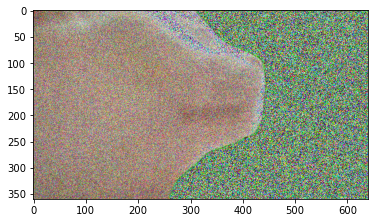

In [41]:
plt.imshow(perturb(image)[:, :, [2, 1, 0]])

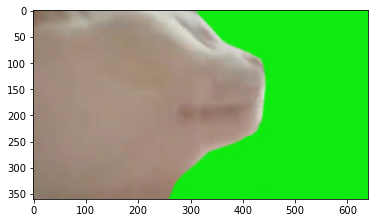

In [42]:
plt.imshow(image[:, :, [2, 1, 0]])

<BarContainer object of 256 artists>

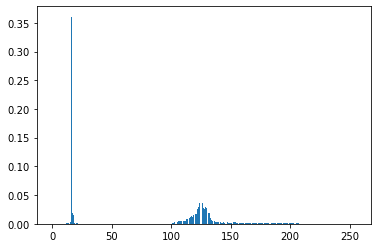

In [43]:
plt.bar([x for x in range(256)], get_pdf(image)[:, 0, 0])

<BarContainer object of 256 artists>

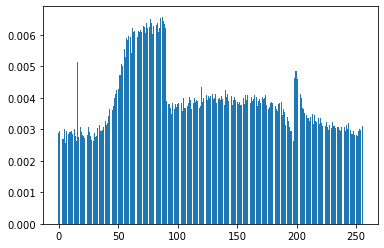

In [44]:
plt.bar([x for x in range(256)], get_pdf(perturb(image))[:, 0, 0])

In [47]:
images_list = list()
num_images = len(os.listdir(cat_path))
for num in range(num_images):
    image = cv2.imread(os.path.join(cat_path, "cat_" + str(num) + ".png"))
    m_image = image[:, ::-1, :]

    image_g_channel = image[:, :, 1]
    image_r_channel = image[:, :, 0]
    m_image_g_channel = m_image[:, :, 1]
    m_image_r_channel = m_image[:, :, 0]

    foreground = np.logical_or(image_g_channel < 180, image_r_channel > 150)
    m_foreground = np.logical_or(m_image_g_channel < 180, m_image_r_channel > 150)
    
    # Equalization
    
    # 1. Perturb the image on the left
    image_p = perturb(image, r=np.random.rand() * 100)
    
    # 2. Calculate the pdf of the perturbed cat on the left
    image_p_pdf = get_pdf(image_p)
    
    # 3. Calculate the pdf of the clean cat on the left
    image_pdf = get_pdf(image)
    
    # 4. Calculate the pdf of the cat on the right
    m_image_pdf = get_pdf(m_image)
    
    # 5. Randomly perturb the target image (Starry Night)
    target_p = perturb(target_image, r=np.random.rand() * 300)
    
    # 6. Calculate the pdf of the perturbed target image
    target_p_pdf = get_pdf(target_p)
    
    # 7. Create cdfs
    image_p_cdf = pdf_to_cdf(image_p_pdf)
    image_cdf = pdf_to_cdf(image_pdf)
    m_image_cdf = pdf_to_cdf(m_image_pdf)
    target_p_cdf = pdf_to_cdf(target_p_pdf)
    
    # 8. LUT for Histogram matching of the cat on the left
    left_map = histogram_matching(image_cdf, image_p_cdf)
    
    # 9. LUT for Histogram matching of the cat on the right
    right_map = histogram_matching(m_image_cdf, target_p_cdf)

    nonzero_x, nonzero_y = np.nonzero(foreground)
    m_nonzero_x, m_nonzero_y = np.nonzero(m_foreground)

    nonzero_cat_values = image[nonzero_x, nonzero_y, :]
    m_nonzero_cat_values = m_image[m_nonzero_x, m_nonzero_y, :]
    
    # 10. New values for the cat on the left
    nonzero_cat_values[:, 2] = np.uint8(left_map[:, 0, 2][nonzero_cat_values[:, 2]])
    nonzero_cat_values[:, 1] = np.uint8(left_map[:, 0, 1][nonzero_cat_values[:, 1]])
    nonzero_cat_values[:, 0] = np.uint8(left_map[:, 0, 0][nonzero_cat_values[:, 0]])
    
    # 11. New values for the cat on the right
    m_nonzero_cat_values[:, 2] = np.uint8(right_map[:, 0, 2][m_nonzero_cat_values[:, 2]])
    m_nonzero_cat_values[:, 1] = np.uint8(right_map[:, 0, 1][m_nonzero_cat_values[:, 1]])
    m_nonzero_cat_values[:, 0] = np.uint8(right_map[:, 0, 0][m_nonzero_cat_values[:, 0]])

    new_frame = background.copy()
    new_frame[nonzero_x, nonzero_y, :] = nonzero_cat_values
    new_frame[m_nonzero_x, m_nonzero_y + translate, :] = m_nonzero_cat_values
    new_frame = new_frame[:, :, [2, 1, 0]]
    images_list.append(new_frame)
    print(f"{num + 1}/{num_images} Complete!")

1/180 Complete!
2/180 Complete!
3/180 Complete!
4/180 Complete!
5/180 Complete!
6/180 Complete!
7/180 Complete!
8/180 Complete!
9/180 Complete!
10/180 Complete!
11/180 Complete!
12/180 Complete!
13/180 Complete!
14/180 Complete!
15/180 Complete!
16/180 Complete!
17/180 Complete!
18/180 Complete!
19/180 Complete!
20/180 Complete!
21/180 Complete!
22/180 Complete!
23/180 Complete!
24/180 Complete!
25/180 Complete!
26/180 Complete!
27/180 Complete!
28/180 Complete!
29/180 Complete!
30/180 Complete!
31/180 Complete!
32/180 Complete!
33/180 Complete!
34/180 Complete!
35/180 Complete!
36/180 Complete!
37/180 Complete!
38/180 Complete!
39/180 Complete!
40/180 Complete!
41/180 Complete!
42/180 Complete!
43/180 Complete!
44/180 Complete!
45/180 Complete!
46/180 Complete!
47/180 Complete!
48/180 Complete!
49/180 Complete!
50/180 Complete!
51/180 Complete!
52/180 Complete!
53/180 Complete!
54/180 Complete!
55/180 Complete!
56/180 Complete!
57/180 Complete!
58/180 Complete!
59/180 Complete!
60/180

In [48]:
clip = mpy.ImageSequenceClip(images_list, fps=25)
audio = mpy.AudioFileClip(os.path.join(data_path, "selfcontrol_part.wav")).set_duration(clip.duration)
clip = clip.set_audio(audioclip = audio)
clip.write_videofile("part5.mp4", codec="libx264")

chunk:   0%|          | 0/159 [00:00<?, ?it/s, now=None]

Moviepy - Building video part5.mp4.
MoviePy - Writing audio in part5TEMP_MPY_wvf_snd.mp3


t:   0%|          | 0/181 [00:00<?, ?it/s, now=None]               

MoviePy - Done.
Moviepy - Writing video part5.mp4



Moviepy - Done !
Moviepy - video ready part5.mp4
